In [1]:
#using sklearn model for Regression
#자전거 대여량 예측 모델 실습
#https://www.kaggle.com/bike-sharing-demand 에서 제공하는 dataset을 사용.
#column description
"""
1. 시간 - 시간별 타임 스탬프
2. 계절 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
3. 휴일
4. 주간
5. 날씨
    1) 맑음 2) 안개 3) 눈 or 비 4) 소나기 + 우박 etc.
6. 온도
7. 체감온도
8. 습도
9. 풍량
10. 미가입
11. 가입
12. 렌탈 수 
"""

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../dataset/exercise2.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot: xlabel='count', ylabel='Count'>

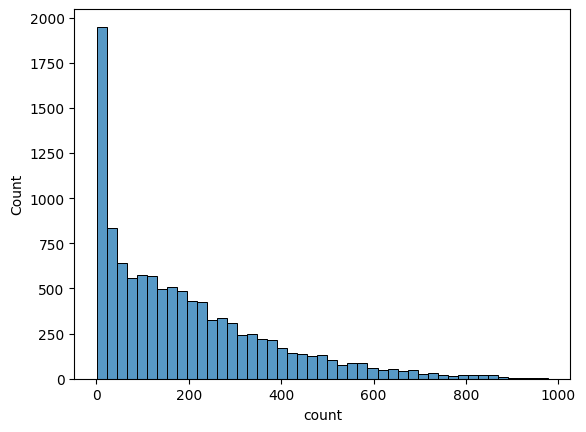

In [5]:
sns.histplot(x = df['count'])

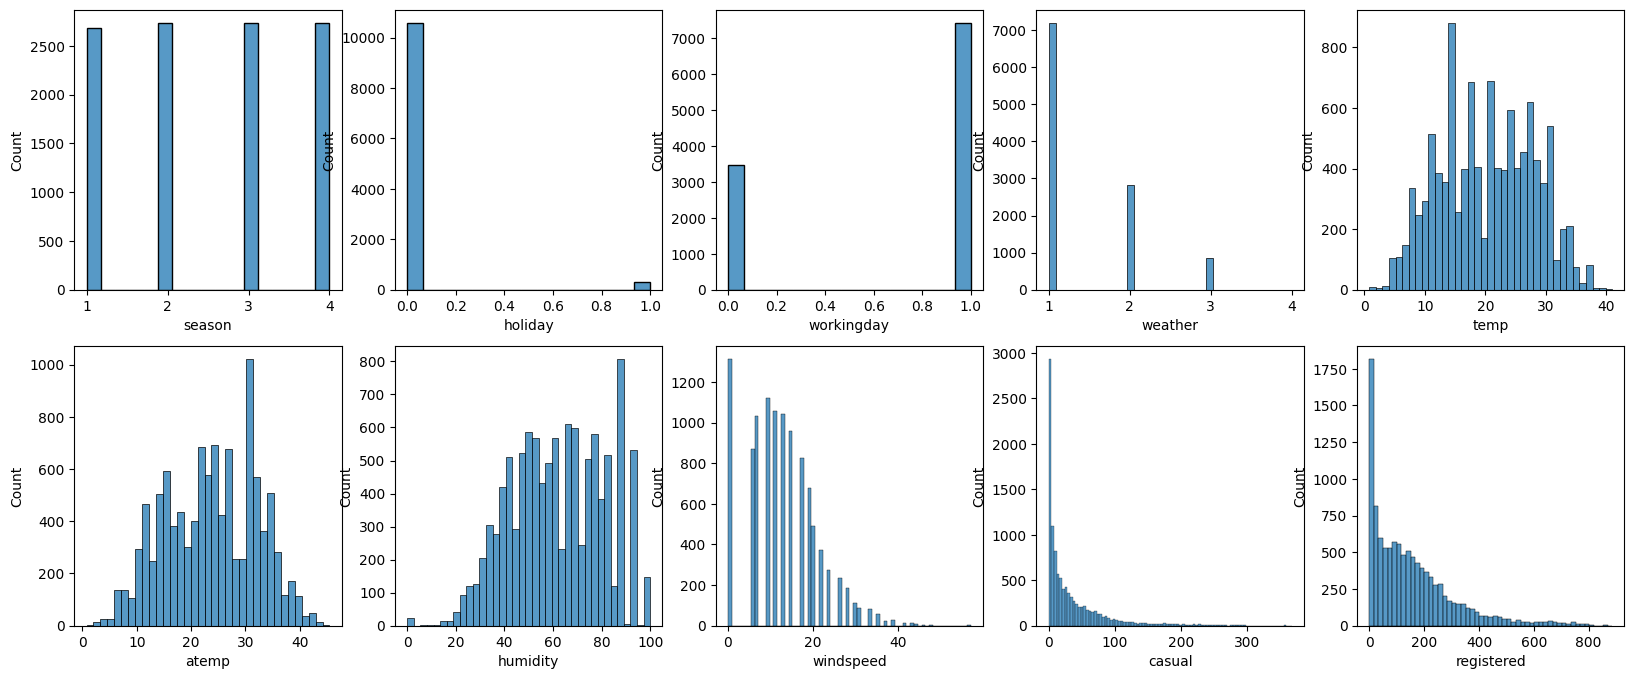

In [9]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20,8)
for i in range(nrows):
    for j in range(ncols):
        attr = i * ncols + j + 1
        sns.histplot(x = df.columns[attr], data = df, ax = axs[i][j])
        

/tmp/ipykernel_1450284/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

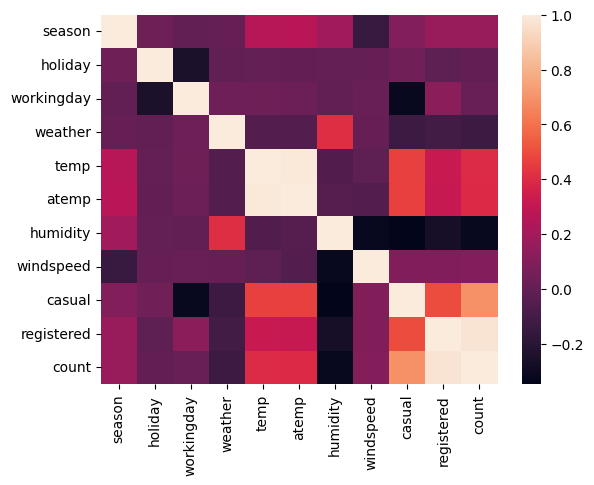

In [10]:
sns.heatmap(df.corr())
#register & casual & 날씨와 <-> count가 연관이 있다.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

Y = df['count']
X = df.drop(['datetime','count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 23)

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mean_squared_log_error(y_test, y_pred)

1.3496682906246781e-26

<AxesSubplot: >

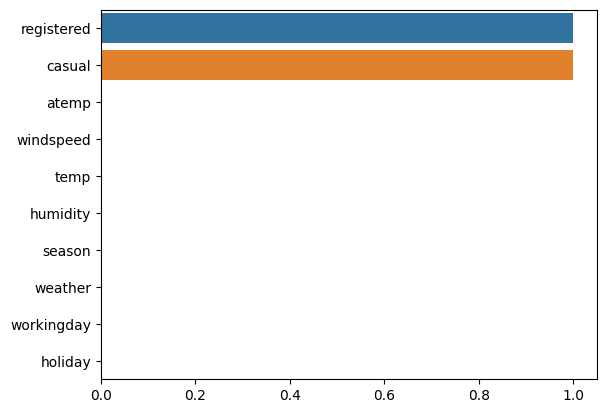

In [15]:
# coefficient -> feature에 대한 weight를 표시
# 가장 영향을 많이 주는 feature를 알 수 있다.
# register & casual의 weight가 가장 크다.
# 하지만 이 결과는 잘못된 결과임.
# register + casual = count 값이기 때문에 이 둘의 feature는 제외하고 모델에 input으로 넣어야 된다.
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

## 의미있는 feature 생성 & 불필요한 feature 삭제 & Scaling

In [29]:
df['datetime'] = df['datetime'].astype('datetime64')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


In [30]:
df.drop(['datetime','casual','registered'], axis=1, inplace=False)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


<AxesSubplot: xlabel='count', ylabel='Count'>

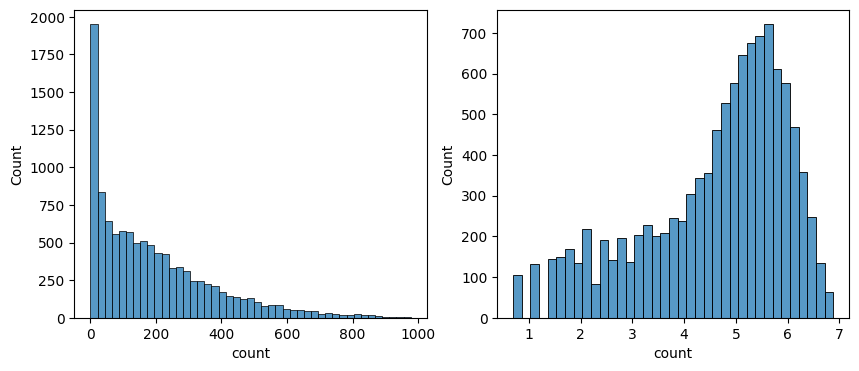

In [21]:
# y를 정규분포로 바꾼다.
y_log = np.log1p(Y) # log1p(x) = log(1 + x)

nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(10,4)
sns.histplot(Y, ax = axs[0])
sns.histplot(y_log, ax = axs[1])

In [31]:
# categorical data를 원핫인코딩 -> 각 값의 크기가 가지는 특성을 없애준다. 
#ex) 봄 : 1 <-> 겨울 : 4, 단순히 계절이 다른 게 아니라 값의 차이도 생김.

df = pd.get_dummies(df, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [32]:
df.columns

Index(['datetime', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'year_2011', 'year_2012', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'holiday_0', 'holiday_1', 'workingday_0', 'workingday_1', 'season_1',
       'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')

In [36]:
Y = y_log
X = df.drop(['count', 'datetime'], axis = 1 ,inplace=False)

In [37]:
X

,temp,atemp,humidity,windspeed,casual,registered,year_2011,year_2012,month_1,month_2,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,3,13,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,8,32,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,5,27,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,3,10,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,0,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,10,231,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,4,164,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,12,117,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y, test_size = 0.3 , random_state=23)

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))

0.22616417919497359

In [42]:
coef = pd.Series(lr_model.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
coef_sort.head(10)
#sns.barplot(x=coef_sort.values, y=coef_sort.index)

year_2012    1.453494e+12
year_2011    1.453494e+12
day_17       6.311084e+11
day_1        6.311084e+11
day_9        6.311084e+11
day_5        6.311084e+11
day_15       6.305899e+11
day_19       6.305899e+11
day_13       6.305899e+11
day_16       6.305899e+11
dtype: float64

## Model 관점

In [43]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [48]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state = 23)
xgb_model = XGBRegressor(random_state = 23)

model_lst = [lr_model, rf_model, xgb_model]
for model in model_lst:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    m = model.__class__.__name__
    score = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
    print(f'{m} msle : {score:.3f}')

LinearRegression msle : 0.226
RandomForestRegressor msle : 0.000
XGBRegressor msle : 0.000
